In [ ]:
import pandas as pd
import numpy as np

# Load
ecom_df = pd.read_csv(r'C:\Users\luket\Downloads\E-commerce churn dataset - REES46\rees46_customer_model.csv')


print("E-commerce Dataset Shape:", ecom_df.shape)

for col in ecom_df.columns:
    dtype = ecom_df[col].dtype
    missing = ecom_df[col].isnull().sum()
    print(f"{col:40} {str(dtype):10} Missing: {missing}")

E-commerce Dataset Shape: (112610, 276)
row_id                                   int64      Missing: 0
user_id                                  int64      Missing: 0
length_mean                              float64    Missing: 0
start_year_mean                          float64    Missing: 0
start_yearday_mean                       float64    Missing: 0
start_month_mean                         float64    Missing: 0
start_monthday_mean                      float64    Missing: 0
start_week_mean                          float64    Missing: 0
start_weekday_mean                       float64    Missing: 0
start_isweekend_mean                     float64    Missing: 0
start_hour_mean                          float64    Missing: 0
haspurchase_mean                         float64    Missing: 0
click_count_mean                         float64    Missing: 0
view_count_mean                          float64    Missing: 0
cart_count_mean                          float64    Missing: 0
purchase_count_


--- Dataset Shape ---
(112610, 276)

--- Column Overview ---
Index(['row_id', 'user_id', 'length_mean', 'start_year_mean',
       'start_yearday_mean', 'start_month_mean', 'start_monthday_mean',
       'start_week_mean', 'start_weekday_mean', 'start_isweekend_mean',
       'start_hour_mean', 'haspurchase_mean', 'click_count_mean',
       'view_count_mean', 'cart_count_mean'],
      dtype='object')

No missing values detected.

--- Duplicate Rows ---
0

--- Summary Stats (Selected Columns) ---
       view_count_mean  cart_count_mean  purchase_count_mean  \
count       112,610.00       112,610.00           112,610.00   
mean              4.39             0.89                 0.68   
std               2.52             0.65                 0.43   
min               0.10             0.00                 0.00   
25%               2.83             0.47                 0.39   
50%               3.77             0.82                 0.63   
75%               5.22             1.19              

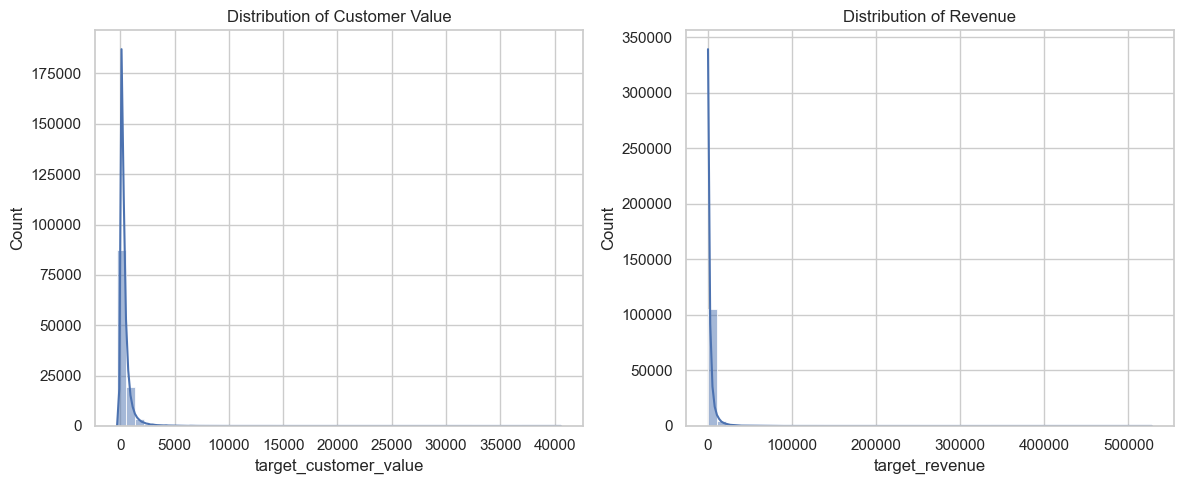

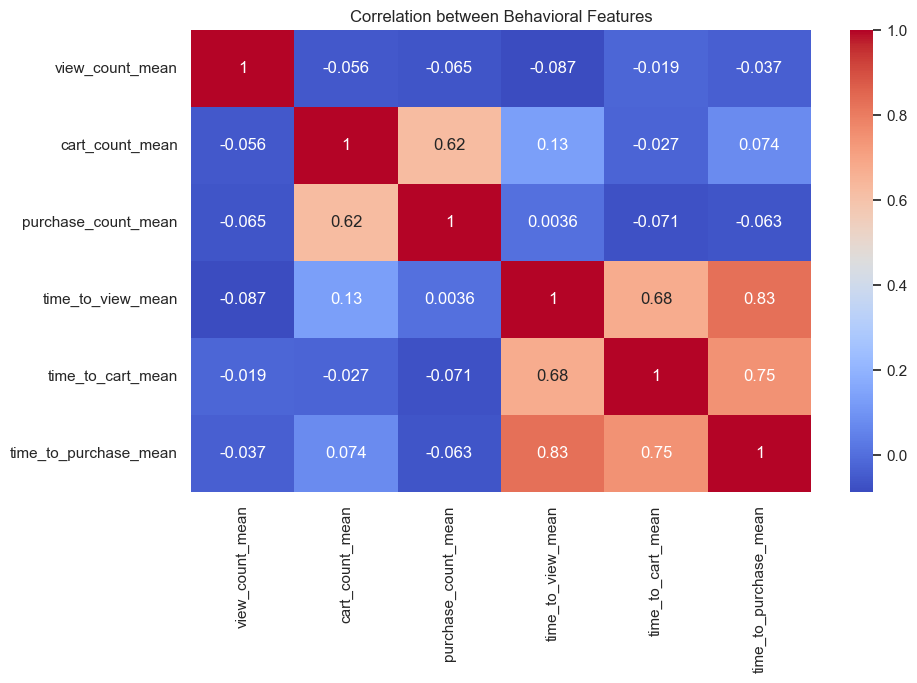

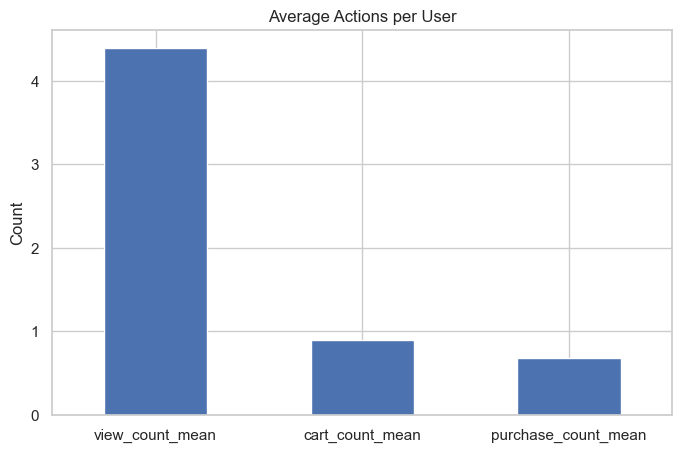

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set display and plotting styles
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid')

# Load Data
file_path = (r'C:\Users\luket\Downloads\E-commerce churn dataset - REES46\rees46_customer_model.csv')  
df = pd.read_csv(file_path)

# Info
print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- Column Overview ---")
print(df.columns[:15]) 

# Check Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\n--- Missing Values ---")
    print(missing.sort_values(ascending=False))
else:
    print("\nNo missing values detected.")

# Check for Duplicates
print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

# Statistical Summary
print("\n--- Summary Stats (Selected Columns) ---")
selected_cols = [
    'view_count_mean', 'cart_count_mean', 'purchase_count_mean',
    'target_customer_value', 'target_revenue', 'session_count_ratio', 'click_count_ratio'
]
print(df[selected_cols].describe())

# Distribution of Target Variables
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['target_customer_value'], bins=50, ax=axs[0], kde=True)
axs[0].set_title('Distribution of Customer Value')
sns.histplot(df['target_revenue'], bins=50, ax=axs[1], kde=True)
axs[1].set_title('Distribution of Revenue')
plt.tight_layout()
plt.show()

# Correlation Heatmap (Behavioral Features)
behav_cols = ['view_count_mean', 'cart_count_mean', 'purchase_count_mean',
              'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean']

plt.figure(figsize=(10, 6))
sns.heatmap(df[behav_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Behavioral Features')
plt.show()

# Value Distribution by Funnel Step
funnel_cols = ['view_count_mean', 'cart_count_mean', 'purchase_count_mean']
df[funnel_cols].mean().plot(kind='bar', figsize=(8, 5))
plt.title('Average Actions per User')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Dataset Overview
- **Source:** Traditional e-commerce user-level behavior dataset (REES46)
- **Rows:** 112,610  
- **Columns:** 276  
- **Missing Values:** None  
- **Duplicates:** None  
- Dataset includes:
  - Aggregated metrics (mean, sum, stddev, min, max)
  - Session behavior (clicks, views, carts, purchases)
  - Time-based features (time to purchase, inter-session time)
  - Revenue and customer value metrics
  - Latent factors for views/purchases

---

## Target Variable Distributions

### `target_customer_value`
- Highly skewed right (long tail)
- Most customers have modest value, a few are very high-value
- **Range:** -290 to 40,582  
- Some users are unprofitable (negative value)

### `target_revenue`
- Similar skewed distribution  
- Majority of users have low revenue contribution  
- Heavy concentration near 0, long tail reaching over 500K

---

## Behavioral Funnel Averages

| Metric                 | Average |
|------------------------|---------|
| Views per user         | 4.39    |
| Carts per user         | 0.89    |
| Purchases per user     | 0.68    |

 Significant drop-offs between stages — particularly from view to cart.

---

## Correlation Insights

- **Cart ↔ Purchase:** Strong correlation (`r = 0.62`)
- **Time metrics:** Highly correlated (`r = 0.75–0.83`) between stages
- **Clicks/Views ↔ Purchases:** Low correlation → quantity ≠ conversion

---

## Key Takeaways

- The dataset is **clean and analysis-ready**.
- Revenue and value are driven by a **small group of users**.
- **Early funnel drop-offs** (from views to carts) present a major opportunity.
- Time-to-action metrics appear highly related and will be key for modeling.
- Sets the stage for segmentation and behavioral deep dives in the next notebook.
